In [1]:
# importing python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [2]:
from matplotlib import style,rcParams
style.use('seaborn-white')
rcParams['figure.figsize'] = 12,6
import warnings
warnings.filterwarnings('ignore')

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from sklearn import metrics

In [22]:
# reading in data
df = pd.read_csv("stock_data.csv")
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [7]:
# creating lemmatizing object
lm = WordNetLemmatizer()

In [8]:
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower() # converting all words to lowercase
        new_item = new_item.split()
        # lemmatizing all words
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item)) # appending all lemmatized words to a corpus
    return corpus

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [10]:
corpus = text_transformation(df['Text'])
print(corpus)
# rcParams['figure.figsize'] = 20,8
# word_cloud = ""
# for row in corpus:
#     for word in row:
#         word_cloud+=" ".join(word)

# wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
# plt.imshow(wordcloud)

['kicker watchlist xide tit soq pnk cpw bpz aj trade method method see prev post', 'user aap movie return fea geed indicator trade year awesome', 'user afraid short amzn looking like near monopoly ebooks infrastructure service', 'mnta', 'oi', 'pgnx', 'aap user current downtrend break otherwise short term correction med term downtrend', 'monday relative weakness nyx win tie tap ice int bmc aon c chk biib', 'goog ower trend line channel test volume support', 'aap watch tomorrow ong entry', 'assuming fcx open tomorrow trigger buy still much like setup', 'really worry everyone expects market rally usually exact opposite happens every time shall see soon bac spx jpm', 'aap gamco arry haverty apple extremely cheap great video', 'user maykiljil posted agree msft going higher possibly north', 'momentum coming back etfc broke resistance solid volume friday ong set', 'ha hitting mean resume targeting level', 'user gameplan shot today liked trend break may c h break oc weekly trend break back jul

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
cv = CountVectorizer()
traindata = cv.fit_transform(corpus)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X, test_x, y, test_y =  train_test_split(traindata, df.Sentiment, 
                                                     test_size = 0.8)

In [15]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000],
             'max_depth': [10, None],
             'min_samples_split': [5],
             'min_samples_leaf': [1],
             'bootstrap': [True]}

In [16]:
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [17]:
for i in range(6):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mean Test Score:  0.6331606217616581
Rank:  5
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}
Mean Test Score:  0.6303972366148531
Rank:  7
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mean Test Score:  0.6324697754749569
Rank:  6
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}
Mean Test Score:  0.6300518134715026
Rank:  8
Parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mean Test Score:  0.7675302245250432
Rank:  3
Parameters:  {'bootstrap': True, 'max_depth': None, 'max

In [18]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=grid_search.best_params_['bootstrap'])

In [19]:
rfc.fit(X,y)

RandomForestClassifier(max_features='sqrt', min_samples_split=5,
                       n_estimators=500)

In [20]:
predictions = rfc.predict(test_x)

Accuracy_score: 0.7803867403314917
Precision_score: 0.8098591549295775
Recall_score: 0.8618843683083511
-------------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.72      0.63      0.67      1028
           1       0.81      0.86      0.84      1868

    accuracy                           0.78      2896
   macro avg       0.76      0.75      0.75      2896
weighted avg       0.78      0.78      0.78      2896



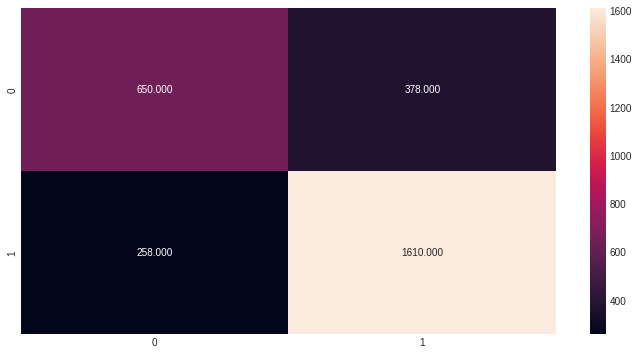

In [21]:
rcParams['figure.figsize'] = 12,6

cm = metrics.confusion_matrix(test_y, predictions)
sns.heatmap(cm, annot=True, fmt = '.3f')

acc_score = accuracy_score(test_y, predictions)
pre_score = precision_score(test_y, predictions)
rec_score = recall_score(test_y, predictions)
print(f'Accuracy_score: {acc_score}')
print(f'Precision_score: {pre_score}')
print(f'Recall_score: {rec_score}')
print('-------------------------------------------------------------------')
cr = classification_report(test_y, predictions)
print(cr)